In [97]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [98]:
df = pd.read_csv('data/exposes-berlin.csv', index_col=0).replace({'None': np.nan, True: 1, False: 0})
df['total_rent'] = pd.to_numeric(df['total_rent'])
df['living_space'] = pd.to_numeric(df['living_space'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['age'] = pd.to_numeric(df['age'])
df['floor'] = pd.to_numeric(df['floor'])
df['zipcode'] = df['zipcode'].apply(lambda zc: 'zc_' + str(zc))
df['price_per_m2'] = df.total_rent / df.living_space

In [99]:
df.head()

,total_rent,living_space,rooms,age,floor,zipcode,city,district,has_balcony,has_kitchen,has_cellar,has_elevator,needs_wbs,price_per_m2
id,,,,,,,,,,,,,,
100027976,998.00,83.00,3.0,112.0,3.0,zc_12557,Berlin,Köpenick (Köpenick),1,1,1,0,0,12.024096
100082825,1900.00,101.00,3.0,1.0,4.0,zc_10435,Berlin,Prenzlauer Berg (Prenzlauer Berg),1,1,1,1,0,18.811881
100107834,1250.00,45.00,2.0,NaN,5.0,zc_10119,Berlin,Mitte (Mitte),1,1,0,0,0,27.777778
100120886,981.23,87.90,4.0,NaN,1.0,zc_13503,Berlin,Heiligensee (Reinickendorf),0,1,0,0,0,11.163026
100122011,1296.00,83.55,2.0,NaN,5.0,zc_13359,Berlin,Wedding (Wedding),0,0,0,0,0,15.511670


In [138]:
2018 - 75

1943

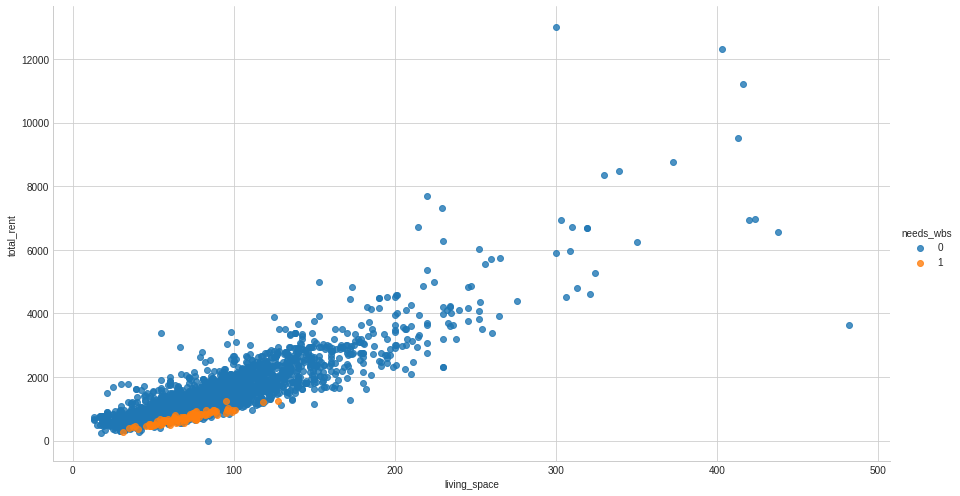

In [143]:
sns.lmplot('living_space',
           'total_rent',
           data=df,
           fit_reg=False,
           hue='needs_wbs',
           size=7,
           aspect=1.8);

In [112]:
dummy_zipcodes = pd.get_dummies(df.zipcode)
df_with_dummies = df.join(dummy_zipcodes)
dummies_formula = ' + '.join(map(str, dummy_zipcodes.columns.values))

In [121]:
df_with_dummies.shape

(3333, 208)

In [128]:
import statsmodels.formula.api as sm
import statsmodels.api as sms

In [129]:
result = sm.ols(
    formula="""
                total_rent ~
                living_space +
                age +
                floor +
                has_balcony +
                has_kitchen +
                has_cellar +
                has_elevator +
                needs_wbs +
            """ + dummies_formula,
    data=df_with_dummies
).fit()

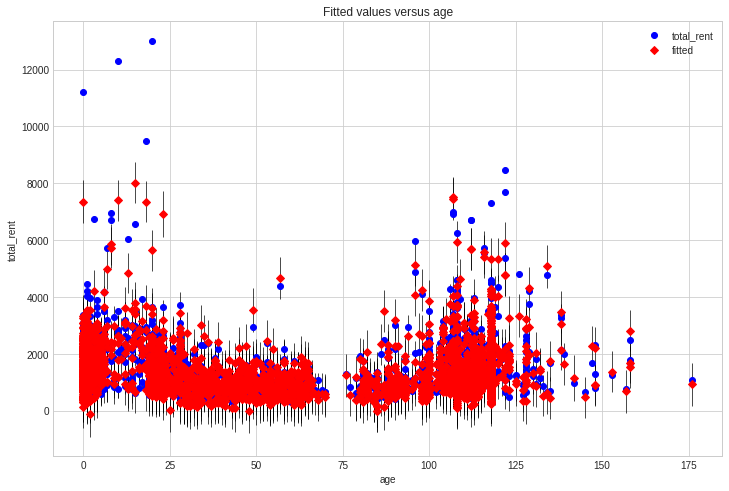

In [132]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sms.graphics.plot_fit(result, 'age', ax=ax)